In [44]:
#Build - Train - Test Recurrent Neural Networks
#Using Sine Wave Data with Simple RNN & Keras

In [45]:
# Import basic libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

#hide warnings
import warnings
warnings.filterwarnings('ignore')

In [46]:
# from timeseries RNN neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [47]:
# imprt Keras: Time Series Data Preparation
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

#import Keras: min-max scaler
from sklearn.preprocessing import MinMaxScaler

In [48]:
#Generate Date

In [49]:
# create a simple sine wave using Numpy
x = np.linspace(0,64,1024)
y= np.sin(x)

In [50]:
x

array([0.00000000e+00, 6.25610948e-02, 1.25122190e-01, ...,
       6.38748778e+01, 6.39374389e+01, 6.40000000e+01])

In [51]:
y

array([0.        , 0.06252029, 0.12479597, ..., 0.86393146, 0.89372716,
       0.92002604])

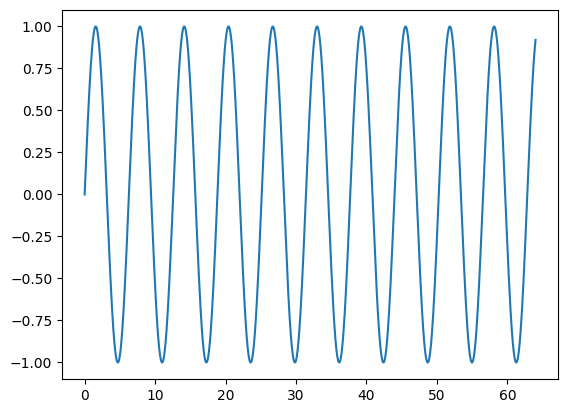

In [52]:
plt.plot(x,y)

In [53]:
df = pd.DataFrame(data=y, index=x, columns=['Sine'])

In [54]:
df.head()

,Sine
0.000000,0.000000
0.062561,0.062520
0.125122,0.124796
0.187683,0.186583
0.250244,0.247641


In [55]:
len(df)

1024

In [56]:
# Split Data --> Train/ Test

In [57]:
# Set Percentage of data to be used for training
train_percent = 0.2

In [58]:
# Number of data points reserved for training the model
# 20% of the original dataset

len(df)*train_percent



204.8

In [59]:
# Need to find the index location of the split

test_length = np.round(len(df)*train_percent)

In [60]:
test_length

205.0

In [61]:
# The testing data set starts at this index

test_start_index = int(len(df) - test_length)

In [62]:
test_start_index

819

In [63]:
# create separate training and testing datasets
data_train = df.iloc[:test_start_index]

# The testing data set starts at this index
data_test = df.iloc[test_start_index:]

In [64]:
data_train.head()

,Sine
0.000000,0.000000
0.062561,0.062520
0.125122,0.124796
0.187683,0.186583
0.250244,0.247641


In [65]:
data_test.head()

,Sine
51.237537,0.826045
51.300098,0.859666
51.362659,0.889923
51.425220,0.916698
51.487781,0.939887


In [66]:
# create a MinMaxScaler object to normalize the data
scaler = MinMaxScaler()

In [67]:
#Train the scaler on the training data
scaler.fit(data_train)

MinMaxScaler()

In [68]:
# Normalize the training data
normalized_train = scaler.transform(data_train)

# Normalize the testing data
normalized_test = scaler.transform(data_test)

#### Create Timeseries Generator Instance

In [69]:
# set the length of the output sequences
length = 50

# batch size: number of timeseries samples in each batch
batch_size = 1

# create a TimeseriesGenerator object: train_tsGenerator

train_tsGenerator = TimeseriesGenerator(normalized_train, normalized_train, length=length, batch_size=batch_size)

In [70]:
len(normalized_train)

819

In [71]:
# what does the first batch look like?
X,y = train_tsGenerator[0]

In [72]:
#  Print x.flatten()
X.flatten()

array([0.49999882, 0.53125908, 0.56239703, 0.59329085, 0.62381964,
       0.65386398, 0.6833063 , 0.7120314 , 0.73992691, 0.76688367,
       0.79279621, 0.81756315, 0.84108759, 0.86327747, 0.88404598,
       0.90331187, 0.92099975, 0.93704041, 0.9513711 , 0.96393574,
       0.97468518, 0.98357735, 0.99057747, 0.99565814, 0.99879949,
       0.99998922, 0.99922268, 0.99650287, 0.99184044, 0.98525361,
       0.97676818, 0.96641732, 0.95424156, 0.94028851, 0.92461278,
       0.90727571, 0.88834511, 0.86789506, 0.84600558, 0.82276231,
       0.79825619, 0.7725831 , 0.7458435 , 0.718142  , 0.68958699,
       0.66029019, 0.63036624, 0.59993221, 0.56910717, 0.53801175])

In [73]:
# print y: waht does X predict?
y

array([[0.50676759]])

#### Build Simple RNN Model

In [74]:
# Data set: Only one column/attribute: Sine values of index x
n_features = 1

# define the model
model = Sequential()

# Add a SimpleRNN layer : Using Simpe RNN cells

model.add(SimpleRNN(100, input_shape=(length, n_features)))

# Add a Dense layer with one neuron

model.add(Dense(1))


#### Compile Model

In [75]:
# Compile the model
# Loss function: Mean Squared Error
# Note: Why MES? the data is real values/continuous: A regression problem
# Optimizer: Adam

model.compile(optimizer='adam', loss='mse')

# Train the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 100)               10200     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


### Train (Fit) Model

In [76]:
# fit the model
# use fit_generator instead of fit

model.fit_generator(train_tsGenerator, epochs=5)

Epoch 1/5
769/769 [==============================] - 5s 6ms/step - loss: 0.0029
Epoch 2/5
769/769 [==============================] - 5s 6ms/step - loss: 1.7574e-04
Epoch 3/5
769/769 [==============================] - 5s 6ms/step - loss: 2.9941e-05
Epoch 4/5
769/769 [==============================] - 5s 6ms/step - loss: 5.9477e-04
Epoch 5/5
769/769 [==============================] - 5s 6ms/step - loss: 5.3441e-06


<Axes: >

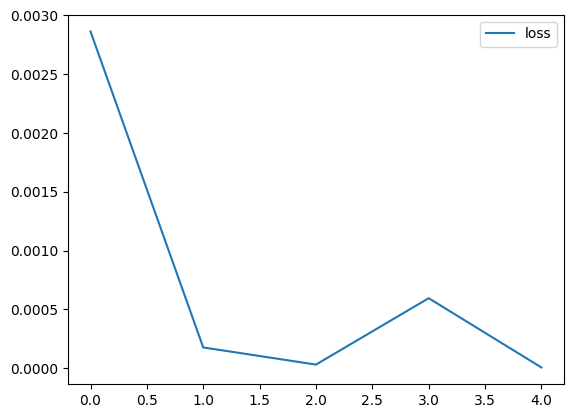

In [77]:
# Load the Loss data into a DataFrame
df_model_loss = pd.DataFrame(model.history.history)

# Plot the Loss data

df_model_loss.plot()

In [78]:
length

50

In [79]:
# Take a sneak peak at the test data
first_eval_batch = normalized_train[-length:]

first_eval_batch

array([[8.31976169e-02],
       [6.67457884e-02],
       [5.19891118e-02],
       [3.89853243e-02],
       [2.77853048e-02],
       [1.84328746e-02],
       [1.09646261e-02],
       [5.40977978e-03],
       [1.79006951e-03],
       [1.19657859e-04],
       [4.05080501e-04],
       [2.64522069e-03],
       [6.83131362e-03],
       [1.29469807e-02],
       [2.09682938e-02],
       [3.08638684e-02],
       [4.25949871e-02],
       [5.61157506e-02],
       [7.13732572e-02],
       [8.83078103e-02],
       [1.06853151e-01],
       [1.26936720e-01],
       [1.48479936e-01],
       [1.71398511e-01],
       [1.95602771e-01],
       [2.20998016e-01],
       [2.47484883e-01],
       [2.74959740e-01],
       [3.03315088e-01],
       [3.32439984e-01],
       [3.62220472e-01],
       [3.92540034e-01],
       [4.23280041e-01],
       [4.54320219e-01],
       [4.85539119e-01],
       [5.16814595e-01],
       [5.48024277e-01],
       [5.79046054e-01],
       [6.09758550e-01],
       [6.40041598e-01],


In [80]:
# reshape the data to the format required by the model
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

first_eval_batch

array([[[8.31976169e-02],
        [6.67457884e-02],
        [5.19891118e-02],
        [3.89853243e-02],
        [2.77853048e-02],
        [1.84328746e-02],
        [1.09646261e-02],
        [5.40977978e-03],
        [1.79006951e-03],
        [1.19657859e-04],
        [4.05080501e-04],
        [2.64522069e-03],
        [6.83131362e-03],
        [1.29469807e-02],
        [2.09682938e-02],
        [3.08638684e-02],
        [4.25949871e-02],
        [5.61157506e-02],
        [7.13732572e-02],
        [8.83078103e-02],
        [1.06853151e-01],
        [1.26936720e-01],
        [1.48479936e-01],
        [1.71398511e-01],
        [1.95602771e-01],
        [2.20998016e-01],
        [2.47484883e-01],
        [2.74959740e-01],
        [3.03315088e-01],
        [3.32439984e-01],
        [3.62220472e-01],
        [3.92540034e-01],
        [4.23280041e-01],
        [4.54320219e-01],
        [4.85539119e-01],
        [5.16814595e-01],
        [5.48024277e-01],
        [5.79046054e-01],
        [6.0

In [81]:
first_eval_batch.shape

(1, 50, 1)

#### Evaluate Model

In [82]:
# All the Code for evaluation

# store the predictions
test_predictions = []

# last n points from the training set
first_eval_batch = normalized_train[-length:]

# reshape the data to the format required by the model
current_batch = first_eval_batch.reshape((1, length, n_features))

# Run a loop to predict the future values
for i in range(len(data_test)):
    
    # get the prediction
    current_pred = model.predict(current_batch)[0]
    
    # store the prediction
    test_predictions.append(current_pred)
    
    # update the current batch to include the prediction
    # drop the first value and add the prediction
    # append the current prediction to the current batch
    # maintain the length of the batch
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

1/1 [==============================] - 0s 20ms/step


In [83]:
# Inverse Transform the predictions
true_predictions = scaler.inverse_transform(test_predictions)

# Add the predictions to the test data
true_predictions

array([[ 0.82521941],
       [ 0.85830738],
       [ 0.88775017],
       [ 0.91353457],
       [ 0.93563684],
       [ 0.95376744],
       [ 0.96811029],
       [ 0.97864597],
       [ 0.98524775],
       [ 0.98812665],
       [ 0.98723687],
       [ 0.98271957],
       [ 0.9746924 ],
       [ 0.96321593],
       [ 0.94838861],
       [ 0.93035565],
       [ 0.90923936],
       [ 0.88518122],
       [ 0.85827722],
       [ 0.82867742],
       [ 0.79649521],
       [ 0.76181723],
       [ 0.72481457],
       [ 0.68557483],
       [ 0.64422069],
       [ 0.60085513],
       [ 0.55559666],
       [ 0.50855649],
       [ 0.45984835],
       [ 0.40959288],
       [ 0.35788676],
       [ 0.30486588],
       [ 0.25064839],
       [ 0.19536433],
       [ 0.1391427 ],
       [ 0.08213512],
       [ 0.02448548],
       [-0.03364945],
       [-0.09209755],
       [-0.15069108],
       [-0.20924075],
       [-0.2675514 ],
       [-0.3254354 ],
       [-0.3826597 ],
       [-0.43902569],
       [-0

In [84]:
data_test

,Sine
51.237537,0.826045
51.300098,0.859666
51.362659,0.889923
51.425220,0.916698
51.487781,0.939887
...,...
63.749756,0.794329
63.812317,0.830756
63.874878,0.863931
63.937439,0.893727


In [85]:
#create a new column in the test data set

data_test['Predictions'] = true_predictions

<Axes: >

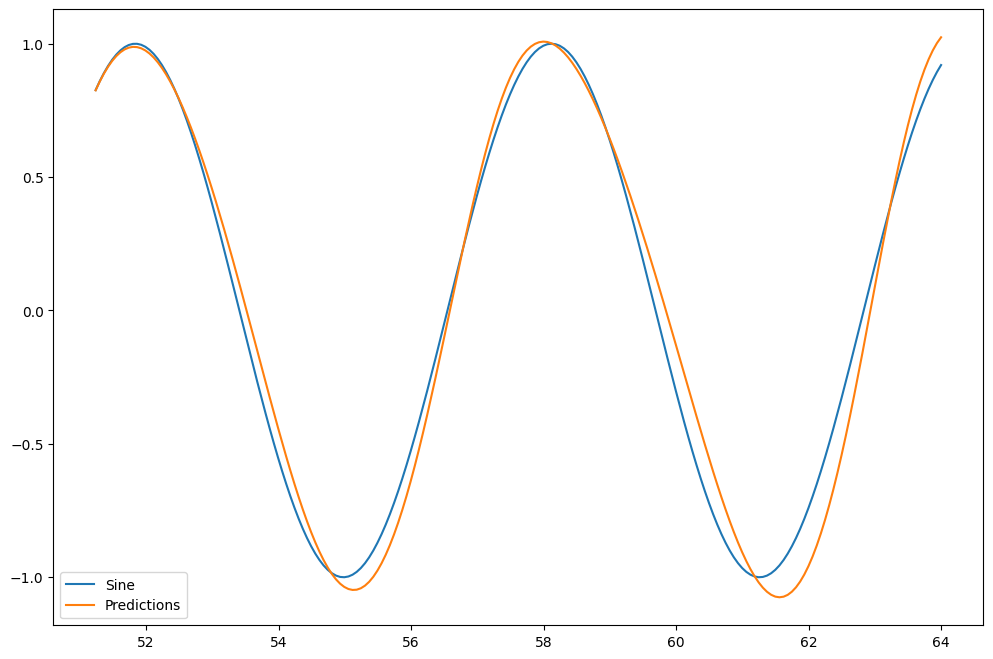

In [86]:
# Plot the data
data_test.plot(figsize=(12,8))